In [23]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import plotly
import warnings
from utils.data_helper import *
import yfinance as yf
import random

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
end_date = datetime.today()
start_date = end_date - BDay(60)
symbol = 'SPY'

# Return Modeling

1. We want to model the next 10days return (rebalance frequency)

2. Bootstrap the data (n=10) into a new distribution, takes quantile q, and we argue that q% chance the return samller than that

3. Adjust q for the aggressiveness of the alpha model

4. This assume daily return has no serial correlation, but likely incorrect

[*********************100%***********************]  1 of 1 completed


0.2630182506026211

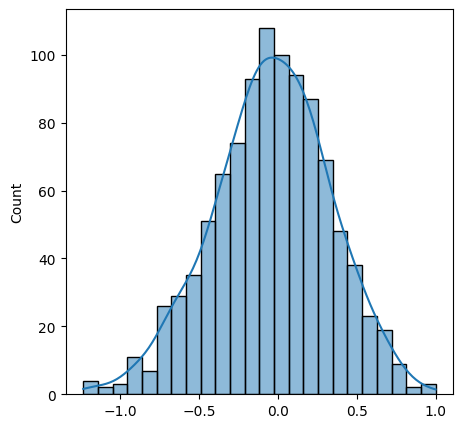

In [53]:
df = yf.download(tickers=symbol, interval="1d",auto_adjust=True, start=start_date, end=end_date)
df['Return'] = 100 * (df['Close'] / df['Close'].shift(1) - 1)

df = df[~df['Return'].isnull()]
rets = list(df['Return'].values)
vols = list(df['Volume'].values)
rets_bs = [np.mean(random.choices(rets, weights=vols, k=10)) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(x=rets_bs, ax=ax, kde=True)

q1 = np.percentile(rets_bs, 80)
q1